# Evaluating Diagnostic Predictions

```{contents}
```

## Load data

In [1]:
import pandas as pd

input_path = '../Data/Processed_Data/'
clinical_data_path = '../Data/Intermediate_Files/'

# # read df_discovery and df_validation
# df_discovery = pd.read_pickle(
#     input_path+'df_discovery.pkl').sort_index()

# df_validation = pd.read_pickle(
#     input_path+'df_validation.pkl').sort_index()

# Load clinical data
discovery_clinical_data = pd.read_csv(clinical_data_path+'discovery_clinical_data.csv',
                                      low_memory=False, index_col=0)

validation_clinical_data = pd.read_csv(clinical_data_path+'validation_clinical_data.csv',
                                        low_memory=False, index_col=0)

# Load pacmap output data
df = pd.read_csv(input_path+'classifier_output/pacmap_5d_output_acute_leukemia_with_predictions.csv', index_col=0)

# drop the samples with missing labels for the ELN AML 2022 Diagnosis
df_original = df.copy()
# Handling NaN values
df = df.fillna('Unknown')

In [2]:
df.to_csv('data/pacmap_5d_output_acute_leukemia_with_predictions.csv')
df = pd.read_csv('data/pacmap_5d_output_acute_leukemia_with_predictions.csv', index_col=0)

## Sankey plots

In [8]:
import pySankey
import matplotlib.pyplot as plt
from source.pacmap_functions import *

def create_color_dict(df, columns, colors):
    color_dict = {}
    unique_values = pd.concat([df[col] for col in columns]).unique()
    for i in range(len(unique_values)): 
        color_dict[unique_values[i]] = colors[i % len(colors)]  # Use modulo to avoid out of index error
    return color_dict

# Example usage:
color_dict = create_color_dict(df, ['FAB', 'MethylScoreAML_Dx_predictions'], get_custom_color_palette())


KeyError: 'FAB'

Text(0.5, 1.0, 'Pacmap 5D Output with MethylScoreAML_Dx Predictions')

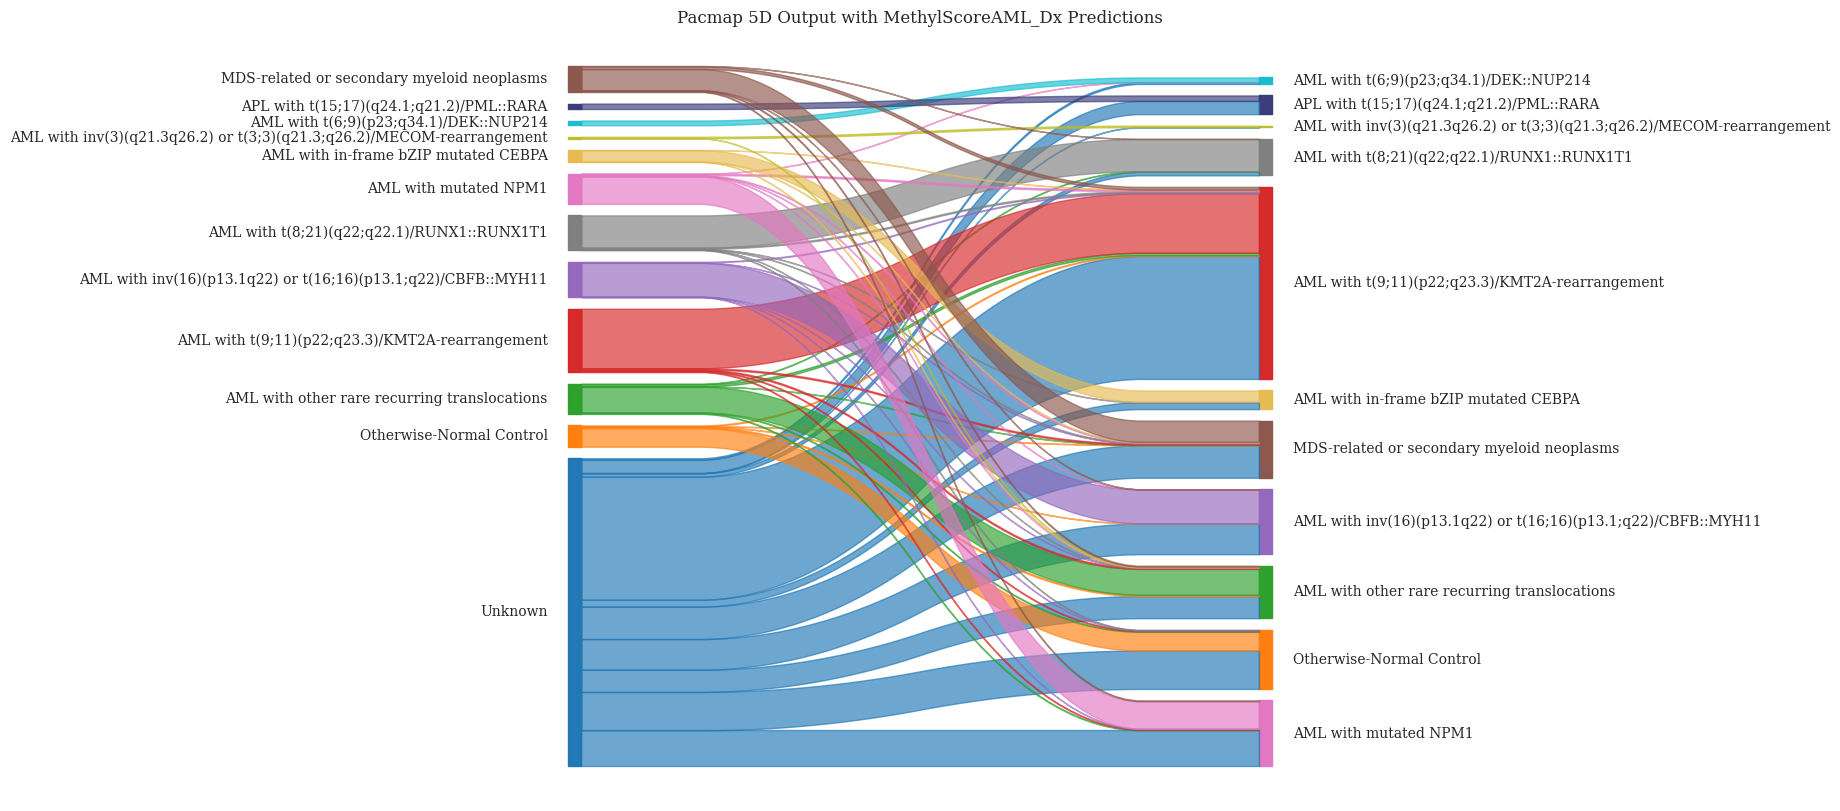

In [4]:
import pySankey
import matplotlib.pyplot as plt
from source.pacmap_functions import *
colors = get_custom_color_palette()

# make dictionary of colors with keys as class names
color_dict = {}
for i in range(len(df['ELN AML 2022 Diagnosis'].unique())): 
    color_dict[df['ELN AML 2022 Diagnosis'].unique()[i]] = colors[i]


pySankey.sankey(left = df['ELN AML 2022 Diagnosis'],right = df['MethylScoreAML_Dx_predictions'], aspect=20, colorDict=color_dict, fontsize=10)
plt.gcf().set_size_inches(10,10)
# add title
plt.title('Pacmap 5D Output with MethylScoreAML_Dx Predictions', fontsize=12)


In [16]:
df.columns

Index(['PaCMAP 1', 'PaCMAP 2', 'PaCMAP 3', 'PaCMAP 4', 'PaCMAP 5',
       'Clinical Trial', 'Sample Type', 'Patient_ID', 'ELN AML 2022 Diagnosis',
       'Train Test', 'Batch', 'Hematopoietic Lineage',
       'MethylScoreAML_Dx_predictions'],
      dtype='object')

In [31]:
# join discovery clinical data with pacmap output
discovery_sankey = df_original[['Clinical Trial', 'ELN AML 2022 Diagnosis', 'MethylScoreAML_Dx_predictions','Hematopoietic Lineage']]\
    .join(discovery_clinical_data[['FAB','Primary Cytogenetic Code']], how='right')
supervised_discovery_sankey = discovery_sankey[~discovery_sankey['ELN AML 2022 Diagnosis'].isna()]

# join validation clinical data with pacmap output
validation_sankey = df_original[['Clinical Trial', 'ELN AML 2022 Diagnosis', 'MethylScoreAML_Dx_predictions','Hematopoietic Lineage']]\
    .join(validation_clinical_data[['FAB','Primary Cytogenetic Code']], how='right')
supervised_validation_sankey = validation_sankey[~validation_sankey['ELN AML 2022 Diagnosis'].isna()]

Text(0.5, 1.0, 'MethylScoreAML Dx Discovery Predictions')

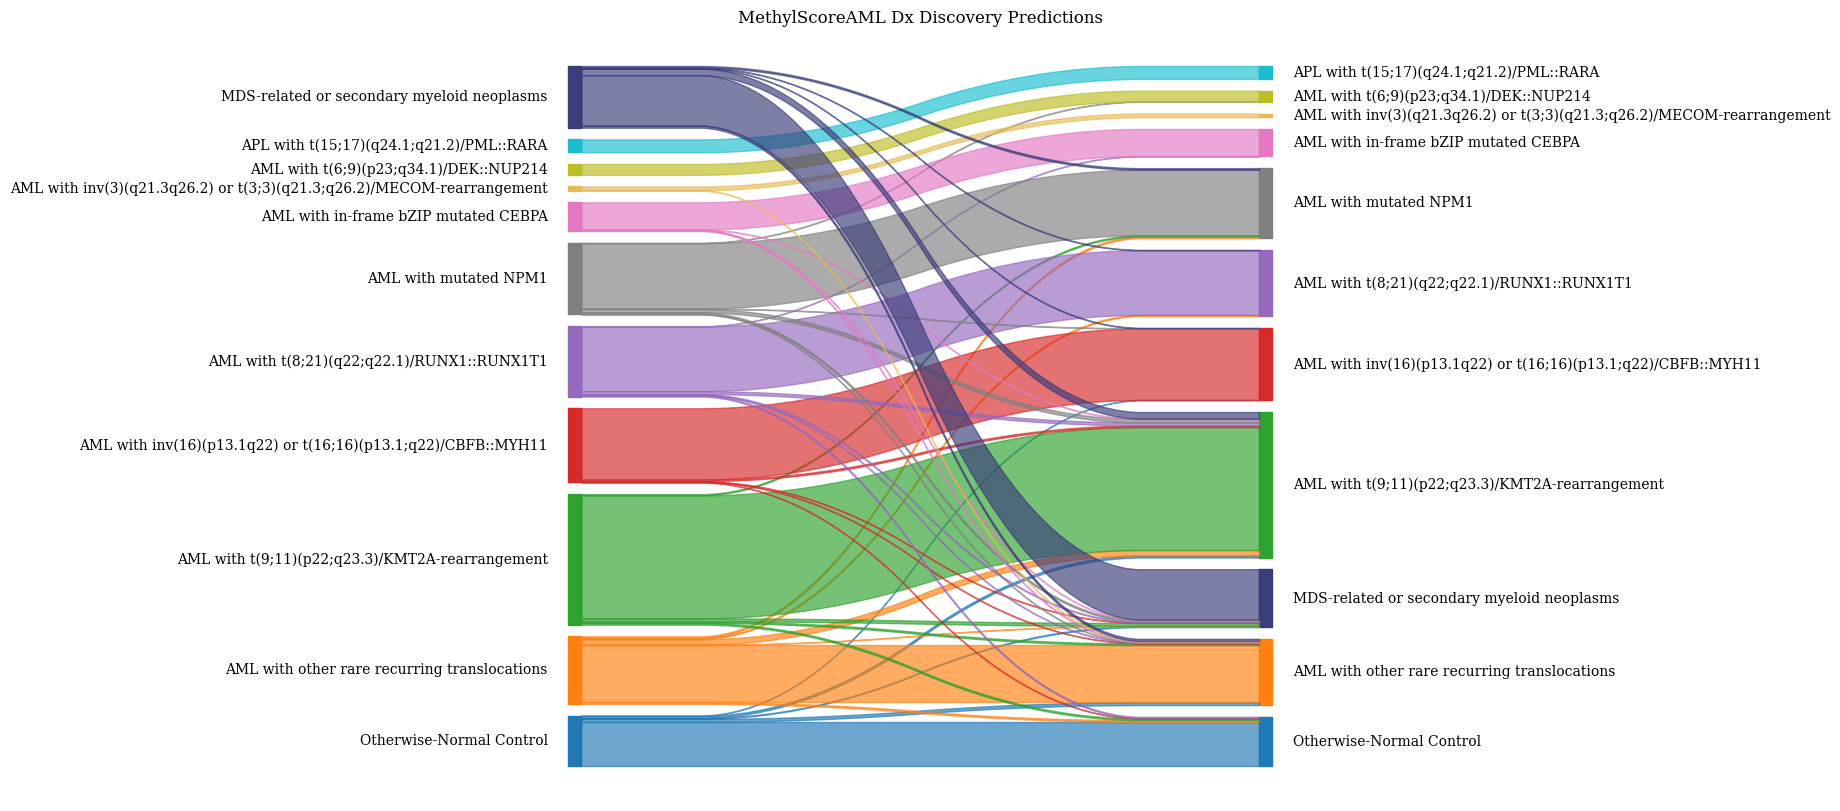

In [33]:
# make dictionary of colors with keys as class names
color_dict = {}
for i in range(len(supervised_discovery_sankey['ELN AML 2022 Diagnosis'].unique())): 
    color_dict[supervised_discovery_sankey['ELN AML 2022 Diagnosis'].unique()[i]] = colors[i]
pySankey.sankey(left = supervised_discovery_sankey['ELN AML 2022 Diagnosis'],
                right = supervised_discovery_sankey['MethylScoreAML_Dx_predictions'],
                  aspect=20, colorDict=color_dict, fontsize=10, )
plt.gcf().set_size_inches(10,10)
# add title
plt.title('MethylScoreAML Dx Discovery Predictions', fontsize=12)

Text(0.5, 1.0, 'MethylScoreAML Dx Validation Predictions')

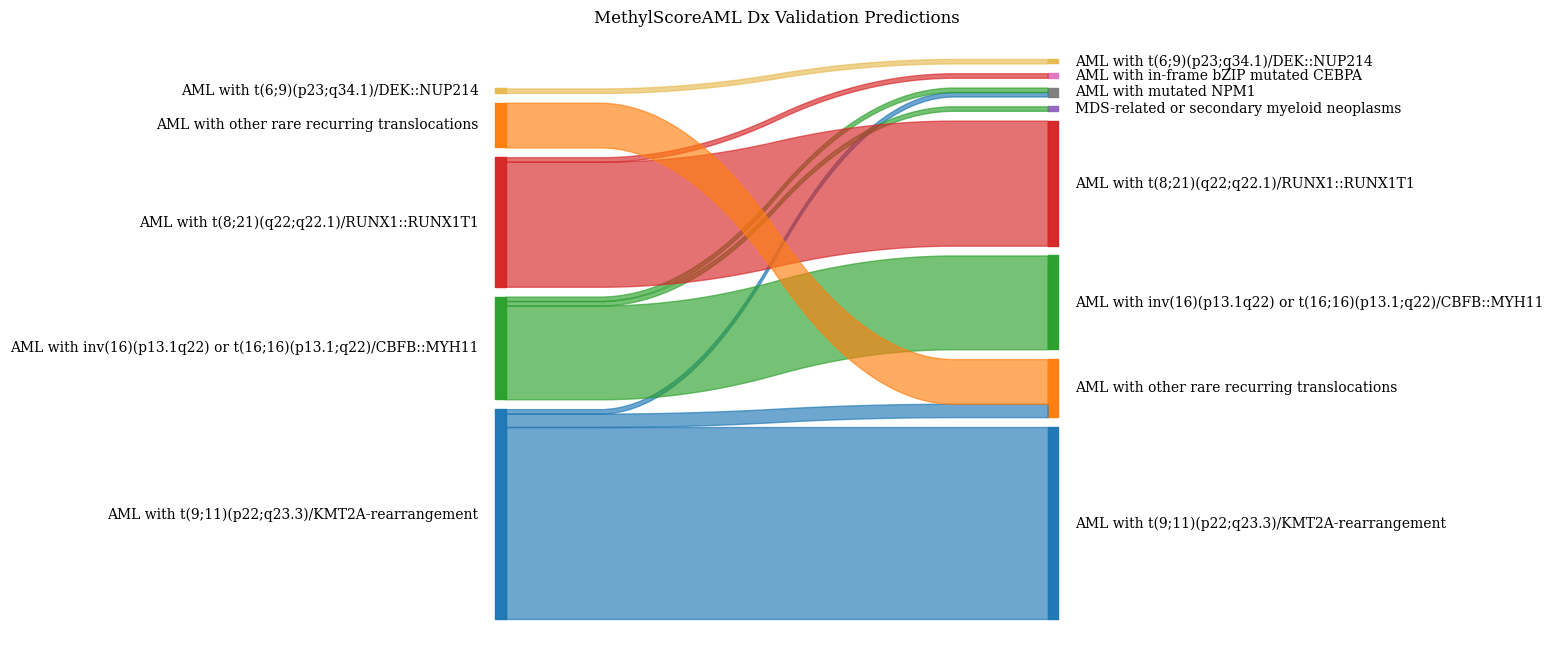

In [41]:
# make dictionary of colors with keys as class names
color_dict = {}
for i in range(len(supervised_validation_sankey['MethylScoreAML_Dx_predictions'].unique())): 
    color_dict[supervised_validation_sankey['MethylScoreAML_Dx_predictions'].unique()[i]] = colors[i]
pySankey.sankey(left = supervised_validation_sankey['ELN AML 2022 Diagnosis'],
                right = supervised_validation_sankey['MethylScoreAML_Dx_predictions'],
                  aspect=20, colorDict=color_dict, fontsize=10)
plt.gcf().set_size_inches(8,8)
# add title
plt.title('MethylScoreAML Dx Validation Predictions', fontsize=12)

In [44]:
unsupervised_validation_sankey = validation_sankey[validation_sankey['ELN AML 2022 Diagnosis'].isna()].fillna('Unknown')

In [49]:
# make dictionary of colors with keys as class names
color_dict = {}
for i in range(len(unsupervised_validation_sankey['MethylScoreAML_Dx_predictions'].unique())): 
    color_dict[unsupervised_validation_sankey['MethylScoreAML_Dx_predictions'].unique()[i]] = colors[i]

# Add the unknown class
color_dict['Unknown'] = colors[-1]

Text(0.5, 1.0, 'MethylScoreAML Dx Validation Predictions in samples with no ELN diagnosis')

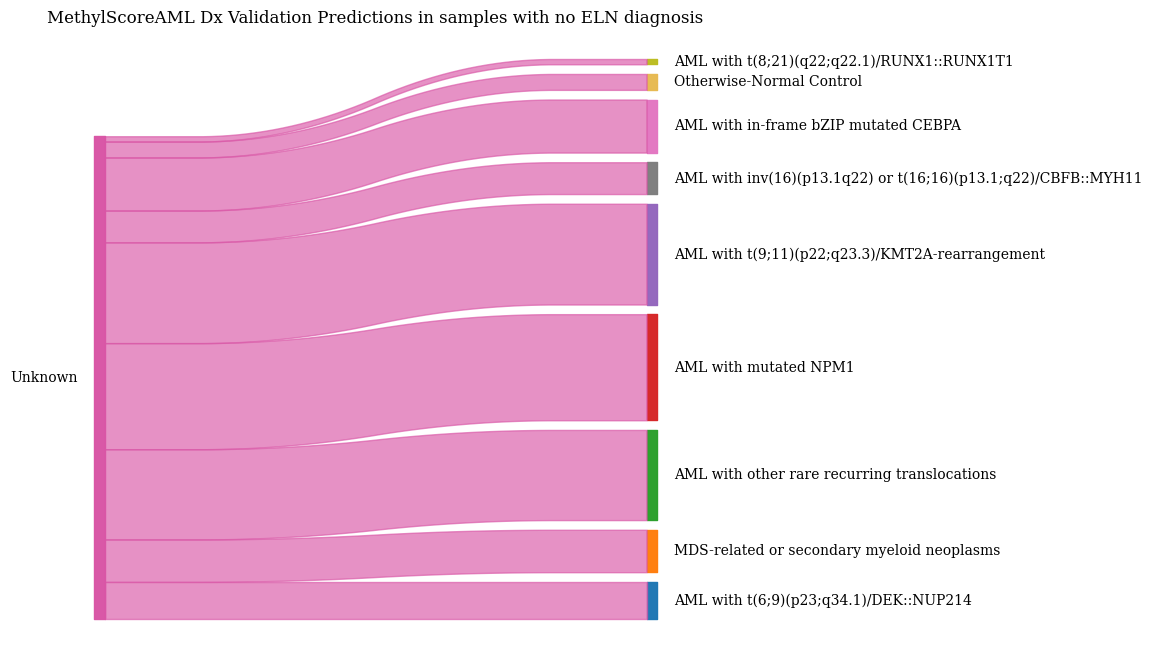

In [54]:
pySankey.sankey(left = unsupervised_validation_sankey['ELN AML 2022 Diagnosis'],
                right = unsupervised_validation_sankey['MethylScoreAML_Dx_predictions'],
                  aspect=20, colorDict=color_dict, fontsize=10)
plt.gcf().set_size_inches(8,8)
# add title
plt.title('MethylScoreAML Dx Validation Predictions in samples with no ELN diagnosis', fontsize=12)

In [ ]:
# make dictionary of colors with keys as class names
color_dict = {}
for i in range(len(unsupervised_validation_sankey['MethylScoreAML_Dx_predictions'].unique())): 
    color_dict[unsupervised_validation_sankey['MethylScoreAML_Dx_predictions'].unique()[i]] = colors[i]

# Add the unknown class
color_dict['Unknown'] = colors[-1]

pySankey.sankey(left = unsupervised_validation_sankey['ELN AML 2022 Diagnosis'],
                right = unsupervised_validation_sankey['MethylScoreAML_Dx_predictions'],
                  aspect=20, colorDict=color_dict, fontsize=10)
plt.gcf().set_size_inches(8,8)
# add title
plt.title('MethylScoreAML Dx Validation Predictions', fontsize=12)

## Watermark

In [4]:
# Add watermark with all packages used
get_ipython().run_line_magic('load_ext', 'watermark')

In [5]:
get_ipython().run_line_magic('watermark', '-v -m -p pandas,pySankey,matplotlib -a Francisco_Marchi@Lamba_Lab_UF')

Author: Francisco_Marchi@Lamba_Lab_UF

Python implementation: CPython
Python version       : 3.8.16
IPython version      : 8.12.2

pandas    : 2.0.2
pySankey  : 0.0.1
matplotlib: 3.7.1

Compiler    : GCC 11.3.0
OS          : Linux
Release     : 5.15.90.1-microsoft-standard-WSL2
Machine     : x86_64
Processor   : x86_64
CPU cores   : 20
Architecture: 64bit

